# Regressão

## Regressão Linear Simples

### Base Plano Saúde

In [54]:
!pip install plotly --upgrade

In [55]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [56]:
base_plano_saude = pd.read_csv("plano_saude.csv")
base_plano_saude.head()

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


In [57]:
X_plano_saude = base_plano_saude.iloc[:, 0].values

In [58]:
y_plano_saude = base_plano_saude.iloc[:, 1].values

In [59]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [60]:
X_plano_saude.shape, y_plano_saude.shape

((10,), (10,))

In [70]:
X_plano_saude = X_plano_saude.reshape(-1, 1)

In [71]:
from sklearn.linear_model import LinearRegression

regessor_plano_saude = LinearRegression()

In [72]:
regessor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
#B0
regessor_plano_saude.intercept_

-558.9490909090912

In [65]:
#B1
regessor_plano_saude.coef_

array([61.86787879])

In [73]:
previsoes = regessor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [ ]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = "regressão")
grafico.show()

In [77]:
regessor_plano_saude.intercept_ + regessor_plano_saude.coef_ * 55

array([2843.78424242])

In [78]:
regessor_plano_saude.predict([[55]])

array([2843.78424242])

In [79]:
regessor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



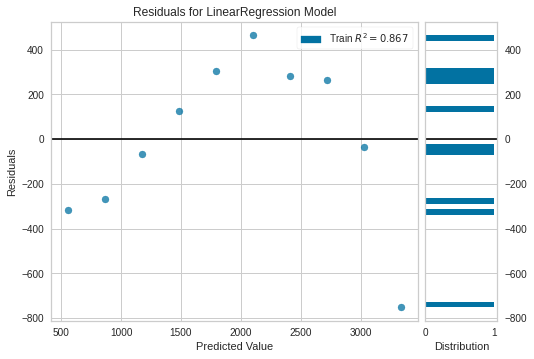

In [80]:
from yellowbrick.regressor import  ResidualsPlot
visualizador = ResidualsPlot(regessor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()

### Base preço das Casas

In [81]:
base_casa = pd.read_csv("house_prices.csv")

In [82]:
base_casa

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [83]:
base_casa.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [84]:
base_casa.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
base_casa.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


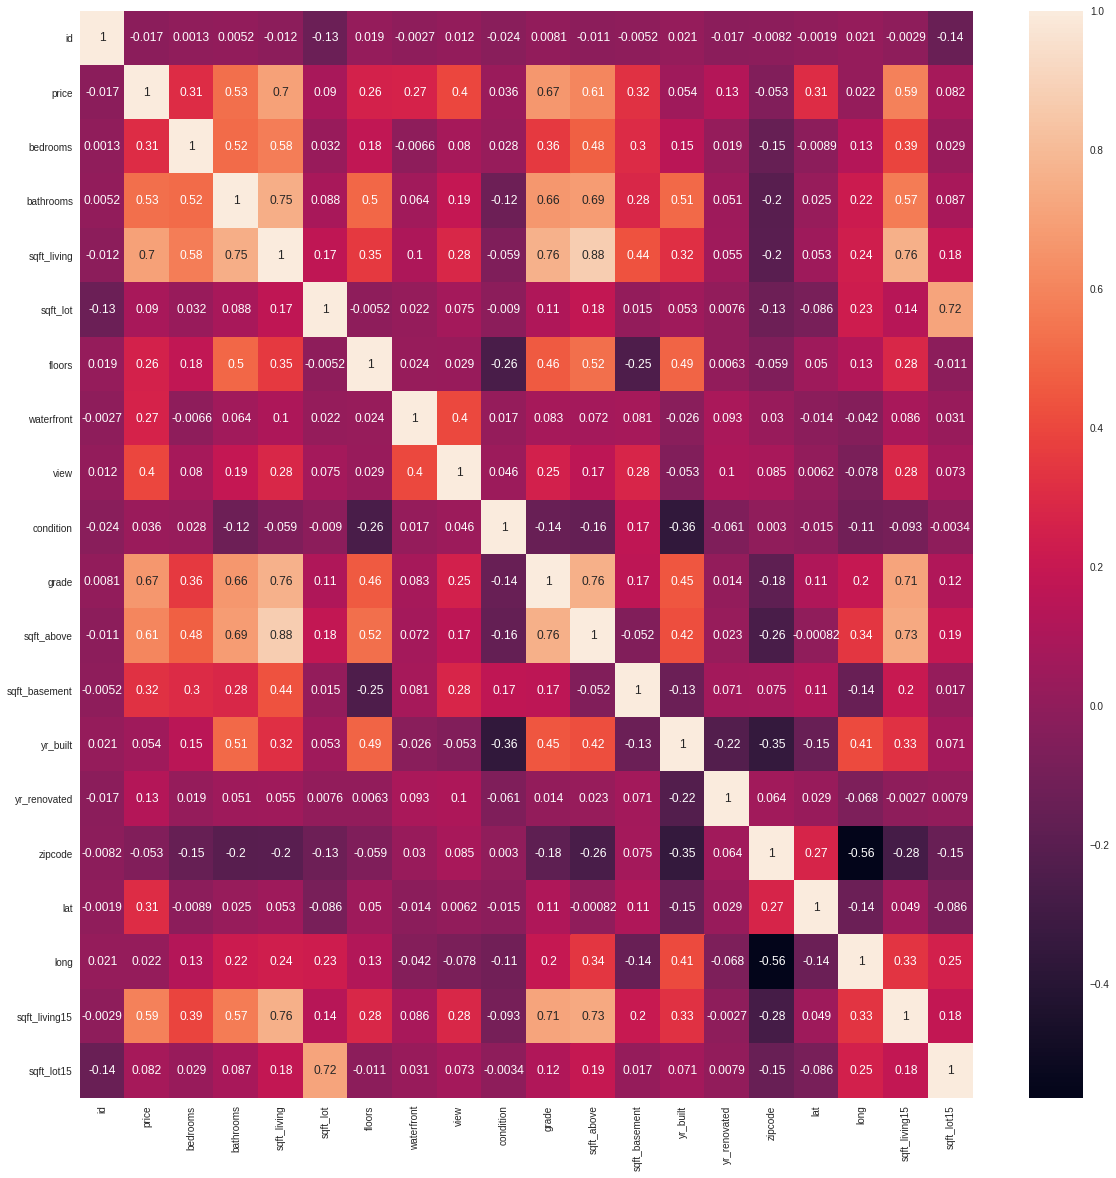

In [86]:
figure = plt.figure(figsize=(20,20))
sns.heatmap(base_casa.corr(), annot=True)

In [87]:
X_casa = base_casa.iloc[:, 5:6].values

In [88]:
y_casa = base_casa.iloc[:, 2].values

In [89]:
from sklearn.model_selection import train_test_split
X_casa_treinamento, X_casa_teste, y_casa_treinamento, y_casa_teste = train_test_split(X_casa, y_casa, test_size =0.3, random_state=0)

In [90]:
X_casa_treinamento.shape, y_casa_treinamento.shape

((15129, 1), (15129,))

In [91]:
X_casa_teste.shape, y_casa_teste.shape

((6484, 1), (6484,))

In [92]:
from sklearn.linear_model import LinearRegression
regressor_simples_casa = LinearRegression()

In [93]:
regressor_simples_casa.fit(X_casa_treinamento, y_casa_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
#B0
regressor_simples_casa.intercept_

-37893.59850106726

In [95]:
#B1
regressor_simples_casa.coef_

array([278.32860644])

In [96]:
regressor_simples_casa.score(X_casa_treinamento, y_casa_treinamento)

0.49453356717789776

In [97]:
previsoes = regressor_simples_casa.predict(X_casa_treinamento)

In [98]:
grafico = px.scatter(x = X_casa_treinamento.ravel(), y = previsoes)
grafico

ValueError: ignored

In [ ]:
grafico1 = px.scatter(x = X_casa_treinamento.ravel(), y = y_casa_treinamento)
grafico2 = px.line(x = X_casa_treinamento.ravel(), y = previsoes)
grafico2.data[0].line.color = "red"
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

In [99]:
previsoe_teste = regressor_simples_casa.predict(X_casa_teste)

In [103]:
abs(y_casa_teste - previsoe_teste).mean()

172604.1288999542

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
mean_absolute_error(y_casa_teste, previsoe_teste)

172604.1288999542

In [106]:
mean_squared_error(y_casa_teste, previsoe_teste)

70170013932.1159

In [ ]:
grafico1 = px.scatter(x = X_casa_teste.ravel(), y = y_casa_teste)
grafico2 = px.line(x = X_casa_teste.ravel(), y = previsoe_teste)
grafico2.data[0].line.color = "red"
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

## Regressão linear Multipla

### Base preço das Casas

In [157]:
base_casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [158]:
X_casa = base_casa.iloc[:, 3:19].values

In [159]:
y_casa = base_casa.iloc[:, 2].values

In [160]:
from sklearn.model_selection import train_test_split
X_casa_treinamento, X_casa_teste, y_casa_treinamento, y_casa_teste = train_test_split(X_casa, y_casa, test_size =0.3, random_state=0)

In [161]:
X_casa_treinamento.shape, X_casa_teste.shape

((15129, 16), (6484, 16))

In [162]:
regresor_mult_casa = LinearRegression()

In [163]:
regresor_mult_casa.fit(X_casa_treinamento, y_casa_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
regresor_mult_casa.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604119e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [165]:
regresor_mult_casa.score(X_casa_treinamento, y_casa_treinamento)

0.7029888085955007

In [166]:
regresor_mult_casa.score(X_casa_teste, y_casa_teste)

0.6885414149062775

In [167]:
previsoes = regresor_mult_casa.predict(X_casa_teste)

In [168]:
from sklearn.metrics import mean_absolute_error

In [169]:
mean_absolute_error(y_casa_teste, previsoes)

123888.44377485772

# Regressão linear Polinomial

### Base Plano de saúde

In [19]:
base_plano_saude2 = pd.read_csv("plano_saude2.csv")

In [20]:
X_plano_saude2 = base_plano_saude2.iloc[:, 0:1].values
y_plano_saude2 = base_plano_saude2.iloc[:, 1].values

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(degree = 4)

In [23]:
X_plano_saude2_poly = poly.fit_transform(X_plano_saude2)

In [24]:
regresor_saude_poly = LinearRegression()

In [25]:
regresor_saude_poly.fit(X_plano_saude2_poly, y_plano_saude2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#B0
regresor_saude_poly.intercept_

16561.97463791195

In [27]:
#B1
regresor_saude_poly.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [28]:
novo_registro = [[40]]
novo = poly.transform(novo_registro)

In [29]:
regresor_saude_poly.predict(novo)

array([1335.33958015])

In [30]:
previsoes = regresor_saude_poly.predict(X_plano_saude2_poly)

In [ ]:
grafico = px.scatter(x = X_plano_saude2[:, 0], y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2[:, 0], y = previsoes, name = "regressão")
grafico.show()

### Base preço das casas

In [121]:
X_casa_treinamento.shape

(15129, 1)

In [122]:
X_casa_teste.shape

(6484, 1)

In [123]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_casa_treinamento_poly = poly.fit_transform(X_casa_treinamento)
X_casa_teste_poly = poly.transform(X_casa_teste)

In [124]:
X_casa_teste_poly.shape, X_casa_treinamento_poly.shape

((6484, 3), (15129, 3))

In [125]:
regressor_casa_poly = LinearRegression()

In [126]:
regressor_casa_poly.fit(X_casa_treinamento_poly, y_casa_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
regressor_casa_poly.score(X_casa_treinamento_poly, y_casa_treinamento)

0.5266754365257983

In [128]:
regressor_casa_poly.score(X_casa_teste_poly, y_casa_teste)

0.5440119730889537

In [129]:
previsoes = regressor_casa_poly.predict(X_casa_teste_poly)

In [130]:
mean_absolute_error(y_casa_teste, previsoes)

165884.01293986585

## Árvore de Decisão

###Base Plano de Saúde

In [133]:
X_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [134]:
from sklearn.tree import DecisionTreeRegressor

In [135]:
regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(X_plano_saude2, y_plano_saude2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [136]:
previsoes = regressor_arvore_saude.predict(X_plano_saude2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [137]:
regressor_arvore_saude.score(X_plano_saude2, y_plano_saude2)

1.0

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = previsoes, name = 'Regressão')
grafico.show()

In [139]:
X_teste_arvore = np.arange(min(X_plano_saude2), max(X_plano_saude2), 0.1)
X_teste_arvore

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [140]:
X_teste_arvore.shape

(450,)

In [141]:
X_teste_arvore = X_teste_arvore.reshape(-1, 1)
X_teste_arvore.shape

(450, 1)

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_arvore_saude.predict(X_teste_arvore), name = 'Regressão')
grafico.show()

In [142]:
regressor_arvore_saude.predict([[40]])

array([1150.])

### Base Preço das Casas

In [143]:
X_casa_treinamento.shape, y_casa_treinamento.shape

((15129, 1), (15129,))

In [144]:
regressor_arvore_casa = DecisionTreeRegressor()

In [145]:
regressor_arvore_casa.fit(X_casa_treinamento, y_casa_treinamento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [146]:
regressor_arvore_casa.score(X_casa_treinamento, y_casa_treinamento)

0.6333418801272528

In [147]:
regressor_arvore_casa.score(X_casa_teste, y_casa_teste)

0.4938582480846785

In [148]:
previsoes = regressor_arvore_casa.predict(X_casa_teste)
previsoes

array([ 371652.48148148, 1119000.        ,  367642.        , ...,
        509418.78      ,  430163.03571429,  368505.30588235])

In [149]:
mean_absolute_error(y_casa_teste, previsoes)

169479.06589217673

## Random Forest

### Plano de Saúde

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
regressor_random_forest = RandomForestRegressor(n_estimators = 10)

In [119]:
regressor_random_forest.fit(X_plano_saude2, y_plano_saude2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
regressor_random_forest.score(X_plano_saude2, y_plano_saude2)

0.9538241805736061

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_random_forest.predict(X_teste_arvore), name = "regressão")
grafico.show()

In [109]:
regressor_random_forest.predict([[40]])

array([1124.])

### Base Preço Casas

In [170]:
X_casa_treinamento.shape, y_casa_treinamento.shape

((15129, 16), (15129,))

In [171]:
X_casa_teste.shape, y_casa_teste.shape

((6484, 16), (6484,))

In [172]:
regressor_random_forest_casa = RandomForestRegressor(n_estimators = 100)

In [173]:
regressor_random_forest_casa.fit(X_casa_treinamento, y_casa_treinamento)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [174]:
regressor_random_forest_casa.score(X_casa_treinamento, y_casa_treinamento)

0.9809333551922322

In [175]:
regressor_random_forest_casa.score(X_casa_teste, y_casa_teste)

0.878589111806744

In [176]:
previsoes = regressor_random_forest_casa.predict(X_casa_teste)

In [177]:
mean_absolute_error(y_casa_teste, previsoes)

67850.60273159572

## SVM

### Base Plano de Saúde

In [178]:
X_plano_saude2.shape

(10, 1)

In [184]:
# Kernel Linear
from sklearn.svm import SVR
regressor_svr_saude = SVR(kernel= "linear")
regressor_svr_saude.fit(X_plano_saude2, y_plano_saude2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = regressor_svr_saude_linear.predict(X_plano_saude2), name = 'Regressão')
grafico.show()

In [180]:
# Kernel Polimonial

In [190]:
regressor_svr_saude_poly = SVR(kernel= "poly", degree=3)
regressor_svr_saude_poly.fit(X_plano_saude2, y_plano_saude2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
grafico = px.scatter(x = X_plano_saude2.ravel(), y = y_plano_saude2)
grafico.add_scatter(x = X_plano_saude2.ravel(), y = regressor_svr_saude_poly.predict(X_plano_saude2), name = 'Regressão')
grafico.show()

In [181]:
# Kernel rbf

In [195]:
# Normalização dos Dados
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_plano_saude2_scaled = scaler_x.fit_transform(X_plano_saude2)

scaler_y = StandardScaler()
y_plano_saude2_scaled = scaler_y.fit_transform(y_plano_saude2.reshape(-1, 1))

In [196]:
regressor_svr_saude_rbf = SVR(kernel="rbf")
regressor_svr_saude_rbf.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
grafico = px.scatter(x = X_plano_saude2_scaled.ravel(), y = y_plano_saude2.ravel())
grafico.add_scatter(x = X_plano_saude2.ravel(), y = regressor_svr_saude_poly.predict(X_plano_saude2), name = 'Regressão')
grafico.show()

In [199]:
novo = [[40]]
novo = scaler_x.transform(novo)

In [201]:
scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo))

array([1333.85650748])

### Base Casas

In [217]:
X_casa_treinamento.shape

(15129, 16)

In [202]:
from sklearn.preprocessing import StandardScaler
scaler_x_casa = StandardScaler()
scaler_y_Casa = StandardScaler()

In [218]:
X_casa_treinamento_scaled = scaler_x_casa.fit_transform(X_casa_treinamento)
y_casa_treinamento_scaled = scaler_y_Casa.fit_transform(y_casa_treinamento.reshape(-1, 1))

In [208]:
X_casa_teste_scaled = scaler_x_casa.fit_transform(X_casa_teste)
y_casa_teste_scaled = scaler_y_Casa.fit_transform(y_casa_teste.reshape(-1, 1))

In [210]:
X_casa_treinamento_scaled.shape, y_casa_treinamento_scaled.shape

((15129, 16), (15129, 1))

In [219]:
X_casa_teste_scaled.shape, y_casa_teste_scaled.shape

((6484, 16), (6484, 1))

In [209]:
regressor_svr_casa = SVR(kernel="rbf")
regressor_svr_casa.fit(X_casa_treinamento_scaled, y_casa_treinamento_scaled.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [211]:
regressor_svr_casa.score(X_casa_treinamento_scaled, y_casa_treinamento_scaled)

0.8123337393217415

In [212]:
regressor_svr_casa.score(X_casa_teste_scaled, y_casa_teste_scaled)

0.7339158652202535

In [223]:
previsoe = regressor_svr_casa.predict(X_casa_teste_scaled)
previsoe

array([-0.54877296,  3.48844091,  0.01692247, ..., -0.43360247,
       -0.92110462, -1.041454  ])

In [224]:
y_casa_teste_inverse = scaler_y_Casa.inverse_transform(y_casa_teste_scaled)
previsoes_inverse = scaler_y_Casa.inverse_transform(previsoe)

In [225]:
mean_absolute_error(y_casa_teste_inverse, previsoes_inverse)

81990.31613599903

## Rede Neurais

## Base plano de Saúde

In [226]:
from sklearn.neural_network import MLPRegressor

In [229]:
regressor_rna_saude = MLPRegressor(max_iter=1000)
regressor_rna_saude.fit(X_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [230]:
regressor_rna_saude.score(X_plano_saude2_scaled, y_plano_saude2_scaled)

0.9580181379861907

In [ ]:
grafico = px.scatter(x = X_plano_saude2_scaled.ravel(), y = y_plano_saude2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude2_scaled.ravel(), y = regressor_rna_saude.predict(X_plano_saude2_scaled), name = 'Regressão')
grafico.show()

In [232]:
novo = [[40]]
novo = scaler_x.transform(novo)
scaler_y.inverse_transform(regressor_rna_saude.predict(novo))

array([1123.38753049])

## Base casas

In [234]:
# 16 -> 9 -> 9 -> 1
regressor_rna_casas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_casas.fit(X_casa_treinamento_scaled, y_casa_treinamento_scaled.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 9), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [236]:
regressor_rna_casas.score(X_casa_treinamento_scaled, y_casa_treinamento_scaled)

0.8953440061795936

In [237]:
regressor_rna_casas.score(X_casa_teste_scaled, y_casa_teste_scaled)

0.8837469598213127

In [239]:
previsoes = regressor_rna_casas.predict(X_casa_teste_scaled)

In [242]:
y_casa_teste_inverse = scaler_y.inverse_transform(y_casa_teste_scaled)
previsoes_inverse = scaler_y.inverse_transform(previsoes)

In [244]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casa_teste_inverse, previsoes_inverse)

582.3542362124927